# **Sistem Rekomendasi Mode Berbasis Citra**

### **Tujuan Proyek**
Tujuan utama dari proyek ini adalah untuk mengembangkan sistem rekomendasi mode yang dapat menganalisis gambar item mode yang dimasukkan dan merekomendasikan item serupa dari kumpulan data berdasarkan kesamaan visual. Sistem ini memanfaatkan Convolutional Neural Networks (CNN) yang telah dilatih sebelumnya untuk mengekstrak fitur dari gambar dan mengukur kesamaan antara fitur tersebut.

### **Langkah-langkah Proyek**
1. **Import Libraries**
2. **Load and Preprocess Images**
3. **Extract Features using Pre-trained CNN**
4. **Measure Similarity**
5. **Recommend Items**
6. **Conclusion**

### **1. Import Libraries**
Pada langkah pertama, mengimpor pustaka yang diperlukan untuk proyek ini. Pustaka utama yang digunakan adalah TensorFlow untuk memanfaatkan model CNN, serta pustaka lain seperti NumPy, Pandas, Matplotlib, OpenCV, dan Scikit-learn.

In [1]:
# Install dependencies
!pip install tensorflow opencv-python-headless

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import cv2

### **2. Load and Preprocess Images**
Pada langkah ini, memuat dan memproses gambar mode dari direktori yang diberikan. Gambar-gambar ini diubah ukurannya menjadi ukuran yang sesuai untuk model VGG16 (224x224 piksel) dan kemudian di-preprocess menggunakan fungsi preprocess_input.

In [3]:
# Extract the uploaded zip file
from zipfile import ZipFile
with ZipFile('women-fashion.zip', 'r') as zip_ref:
    zip_ref.extractall('women-fashion')

# Path to the directory containing images
img_dir = 'women-fashion/women fashion'

# Load image filenames
img_files = [os.path.join(img_dir, file) for file in os.listdir(img_dir) if file.endswith(('jpg', 'jpeg', 'png', 'webp'))]

# Function to load and preprocess images
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load and preprocess all images
images = [load_and_preprocess_image(file) for file in tqdm(img_files)]
images = np.vstack(images)


100%|██████████| 96/96 [00:01<00:00, 70.94it/s]


### **3. Extract Features using Pre-trained CNN**
Memanfaatkan model VGG16 yang telah dilatih sebelumnya pada dataset ImageNet untuk mengekstrak fitur dari gambar-gambar mode. Fitur-fitur ini akan digunakan untuk mengukur kesamaan antara gambar-gambar mode.

In [4]:
# Load VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Extract features
features = model.predict(images)

# Save features and filenames
feature_df = pd.DataFrame(features)
feature_df['filename'] = img_files
feature_df.to_csv('fashion_features.csv', index=False)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step


### **4. Measure Similarity**
Setelah fitur-fitur diekstraksi, saya menggunakan kesamaan kosinus untuk mengukur kesamaan antara fitur gambar masukan dan fitur-fitur gambar dalam kumpulan data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


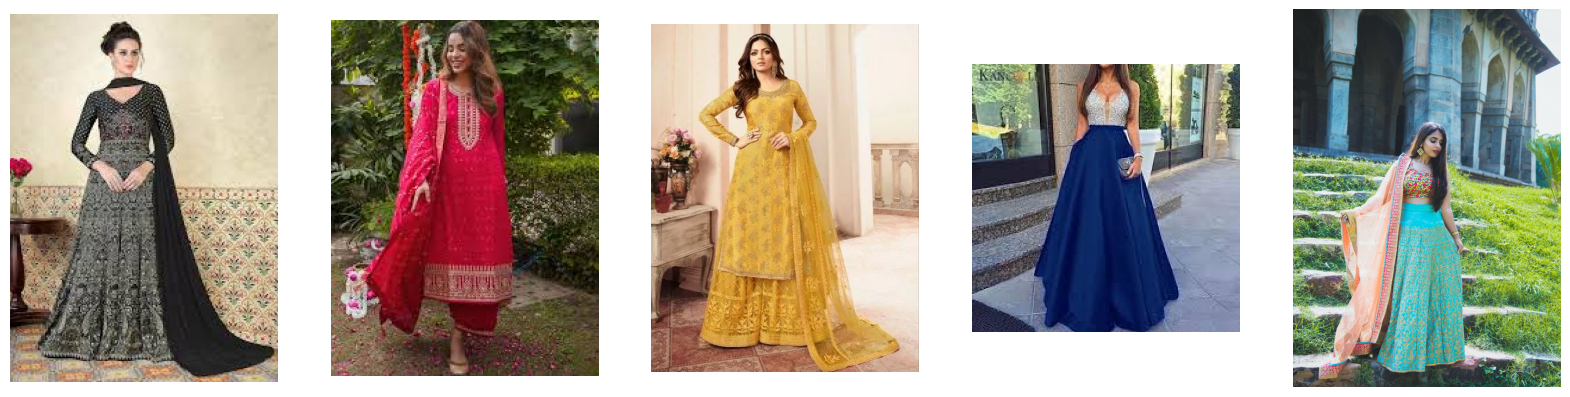

In [5]:
# Load extracted features
feature_df = pd.read_csv('fashion_features.csv')
features = feature_df.iloc[:, :-1].values
filenames = feature_df['filename'].values

# Function to get similar images
def get_similar_images(query_img_path, features, filenames, top_n=5):
    query_img = load_and_preprocess_image(query_img_path)
    query_features = model.predict(query_img)

    # Compute cosine similarity
    similarities = cosine_similarity(query_features, features).flatten()

    # Get top N similar images
    similar_indices = np.argsort(similarities)[-top_n:]
    similar_filenames = filenames[similar_indices]

    return similar_filenames

# Test with a sample image
query_img_path = img_files[0]
similar_images = get_similar_images(query_img_path, features, filenames)

# Display similar images
plt.figure(figsize=(20, 10))
for i, img_path in enumerate(similar_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


### **5. Recommend Items**
Saya mengembangkan fungsi rekomendasi yang dapat menampilkan gambar masukan dan beberapa gambar yang paling mirip dari kumpulan data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


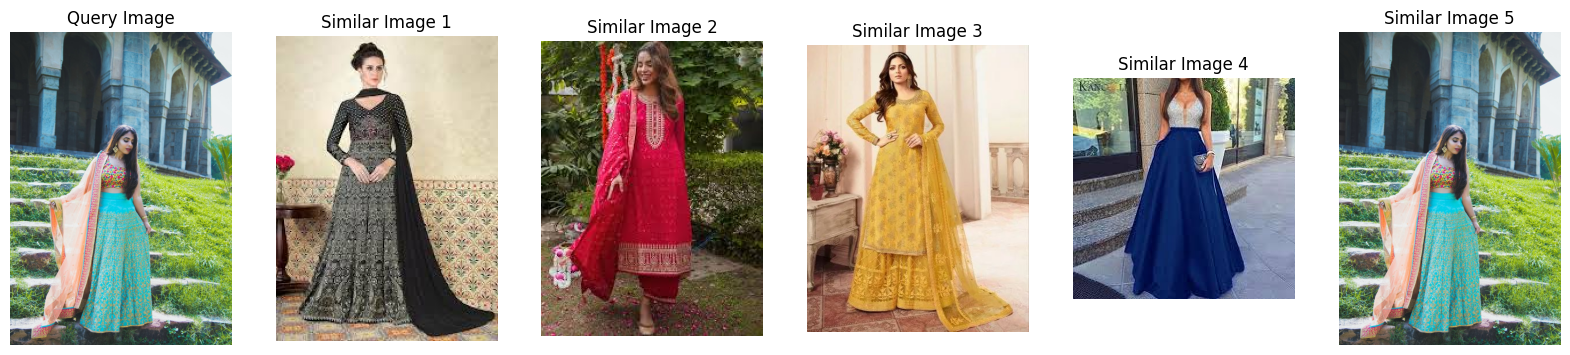

In [6]:
def recommend_items(query_img_path, features, filenames, top_n=5):
    similar_images = get_similar_images(query_img_path, features, filenames, top_n)

    # Display query image
    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 6, 1)
    plt.imshow(query_img)
    plt.title('Query Image')
    plt.axis('off')

    # Display similar images
    for i, img_path in enumerate(similar_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 6, i+2)
        plt.imshow(img)
        plt.title(f'Similar Image {i+1}')
        plt.axis('off')
    plt.show()

# Recommend items for a sample image
recommend_items(query_img_path, features, filenames)


### **6. Conclusion**
Dengan langkah-langkah ini, saya telah mengembangkan sistem rekomendasi mode yang dapat menganalisis gambar item mode yang dimasukkan dan merekomendasikan item serupa berdasarkan kesamaan visual. Sistem ini menggunakan model CNN yang telah dilatih sebelumnya (VGG16) untuk mengekstrak fitur dari gambar dan menggunakan kesamaan kosinus untuk mengukur kesamaan antara fitur gambar.